<a href="https://colab.research.google.com/github/Thanmaigottumukkala/Principles-of-Data-Science/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Essential Libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV File

In [3]:
from google.colab import files
uploaded = files.upload()  # Uploading the file from my local machine
df = pd.read_csv('diabetes.csv')
df

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Replacing Missing Values with Zero

In [9]:
columns_to_fill = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

df[columns_to_fill] = df[columns_to_fill].fillna(0)


#Checking for Missing Data in the Dataset

In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



# A


Glucose Statistics:
Sample Mean Glucose: 116.64
Population Mean Glucose: 120.89
Sample Max Glucose: 183
Population Max Glucose: 199



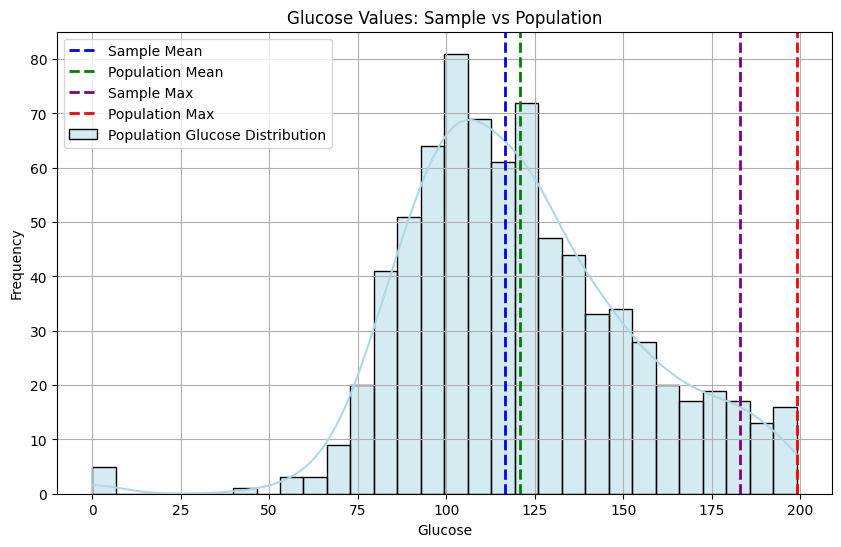

In [54]:
np.random.seed(42)
sample_25 = df.sample(n=25, random_state=42)

mean_glucose_sample = sample_25['Glucose'].mean()
max_glucose_sample = sample_25['Glucose'].max()
mean_glucose_pop = df['Glucose'].mean()
max_glucose_pop = df['Glucose'].max()

print("Glucose Statistics:")
print(f"Sample Mean Glucose: {mean_glucose_sample:.2f}")
print(f"Population Mean Glucose: {mean_glucose_pop:.2f}")
print(f"Sample Max Glucose: {max_glucose_sample}")
print(f"Population Max Glucose: {max_glucose_pop}\n")

# Glucose chart
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='lightblue', label='Population Glucose Distribution')
plt.axvline(mean_glucose_sample, color='blue', linestyle='--', linewidth=2, label='Sample Mean')
plt.axvline(mean_glucose_pop, color='green', linestyle='--', linewidth=2, label='Population Mean')
plt.axvline(max_glucose_sample, color='purple', linestyle='--', linewidth=2, label='Sample Max')
plt.axvline(max_glucose_pop, color='red', linestyle='--', linewidth=2, label='Population Max')

plt.title('Glucose Values: Sample vs Population')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# B

98th Percentile of BMI:
Sample 98th Percentile BMI: 40.25
Population 98th Percentile BMI: 47.53



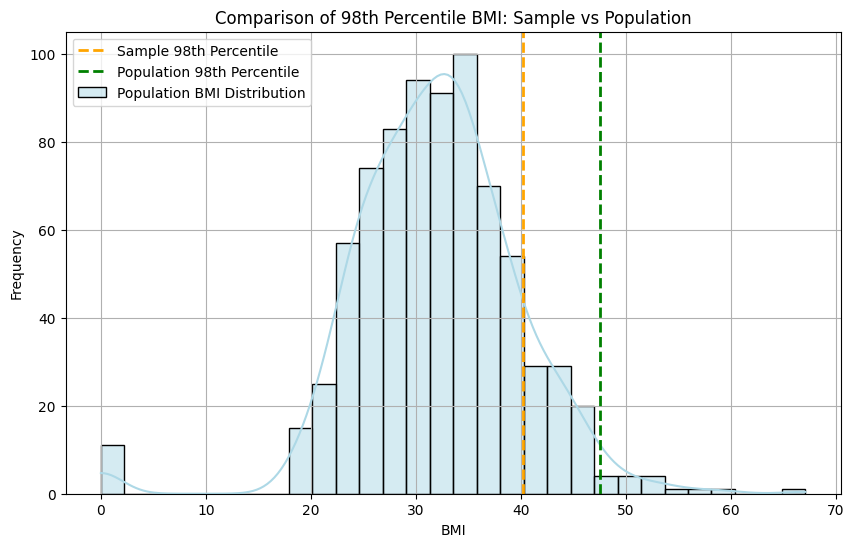

In [51]:
bmi_98_sample = np.percentile(sample_25['BMI'], 98)
bmi_98_pop = np.percentile(df['BMI'], 98)

print("98th Percentile of BMI:")
print(f"Sample 98th Percentile BMI: {bmi_98_sample:.2f}")
print(f"Population 98th Percentile BMI: {bmi_98_pop:.2f}\n")

# BMI chart
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='lightblue', label='Population BMI Distribution')
plt.axvline(bmi_98_sample, color='orange', linestyle='--', linewidth=2, label='Sample 98th Percentile')
plt.axvline(bmi_98_pop, color='green', linestyle='--', linewidth=2, label='Population 98th Percentile')

plt.title('Comparison of 98th Percentile BMI: Sample vs Population')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# C

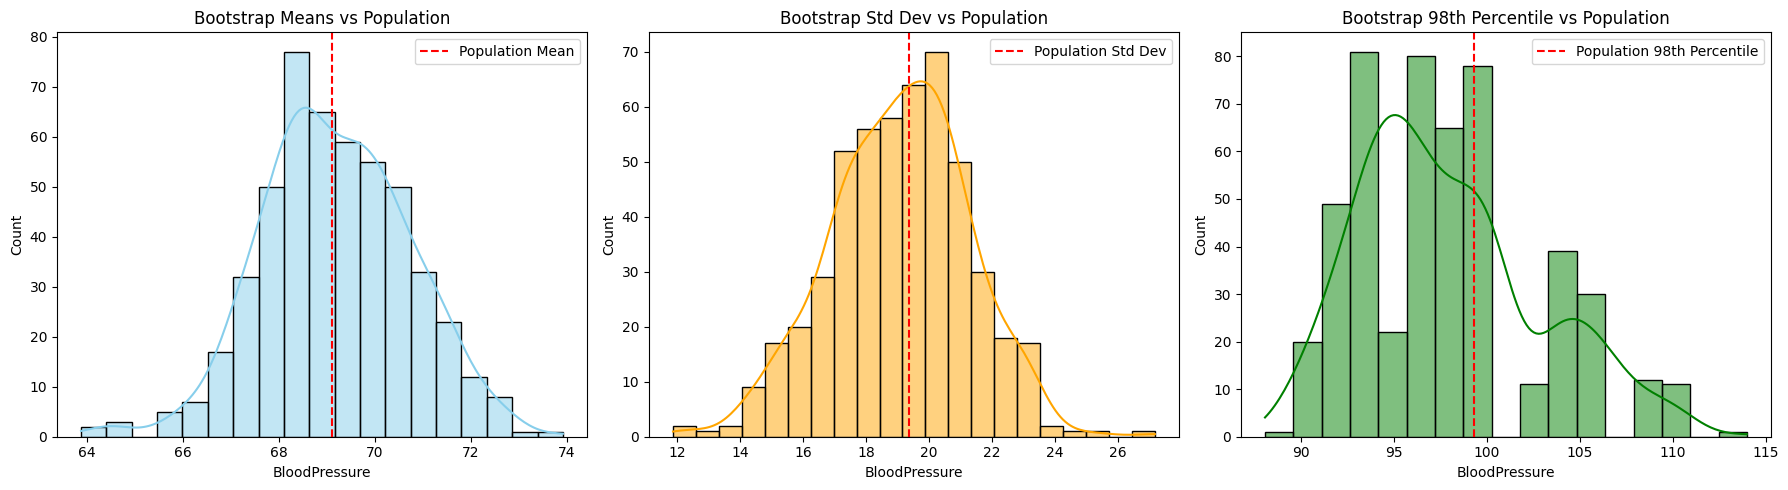

BloodPressure Statistics from Bootstrap:
Bootstrap Avg Mean: 69.18
Population Mean: 69.11
Bootstrap Avg Std Dev: 19.07
Population Std Dev: 19.36
Bootstrap Avg 98th Percentile: 97.90
Population 98th Percentile: 99.32



In [53]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

np.random.seed(42)
for _ in range(500):
    sample = df.sample(n=150, replace=True)
    bp = sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_percentiles.append(np.percentile(bp, 98))

bootstrap_stats = pd.DataFrame({
    'Mean': bootstrap_means,
    'Std': bootstrap_stds,
    '98th Percentile': bootstrap_percentiles
})

pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_percentile = np.percentile(df['BloodPressure'], 98)

# Bootstrap charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean
sns.histplot(bootstrap_stats['Mean'], kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
axes[0].set_title('Bootstrap Means vs Population')
axes[0].set_xlabel('BloodPressure')
axes[0].legend()

# Std Dev
sns.histplot(bootstrap_stats['Std'], kde=True, ax=axes[1], color='orange')
axes[1].axvline(pop_std, color='red', linestyle='--', label='Population Std Dev')
axes[1].set_title('Bootstrap Std Dev vs Population')
axes[1].set_xlabel('BloodPressure')
axes[1].legend()

# 98th Percentile
sns.histplot(bootstrap_stats['98th Percentile'], kde=True, ax=axes[2], color='green')
axes[2].axvline(pop_percentile, color='red', linestyle='--', label='Population 98th Percentile')
axes[2].set_title('Bootstrap 98th Percentile vs Population')
axes[2].set_xlabel('BloodPressure')
axes[2].legend()

plt.tight_layout()
plt.show()


print("BloodPressure Statistics from Bootstrap:")
print(f"Bootstrap Avg Mean: {np.mean(bootstrap_means):.2f}")
print(f"Population Mean: {pop_mean:.2f}")
print(f"Bootstrap Avg Std Dev: {np.mean(bootstrap_stds):.2f}")
print(f"Population Std Dev: {pop_std:.2f}")
print(f"Bootstrap Avg 98th Percentile: {np.mean(bootstrap_percentiles):.2f}")
print(f"Population 98th Percentile: {pop_percentile:.2f}\n")

**Report on Findings:**




I worked on bootstrap sampling by creating 500 resampled datasets from the population data to estimate key BloodPressure statistics.

After analyzing these samples, I found the Bootstrap Avg Mean was 69.18, which was virtually identical to the Population Mean of 69.11 indicating high agreement. The Bootstrap Avg Std Dev was 19.07, which was also lower than the population Std Dev of 19.36 which we would expect due to sampling variability. The Bootstrap Avg 98th Percentile was 97.90 and the Population 98th Percentile was 99.32, which is a minor underestimation.

Overall, these results suggest that bootstrap sampling, even with a smaller sample size (n=150), can produce estimates that are valid and trustworthy.
Each histogram for each of the statistics shows that the population values are located well within the range of the bootstrap distributions which is encouraging. Bootstrapping appears quite robust, especially in situations where an original population is too large or cannot be fully accessible to conduct repeated sampling from.  Overall, the method performed as intended and was useful in developing estimated true population parameters by using repeated sampling with replacement.